In [10]:
#import the libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.metrics import RootMeanSquaredError
from keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
#import data
df = %store -r weather
df = weather
df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),Avg Temp
0,2019-01-07,2.5,18.1,0.0,W,15.0,0:33,6.1,77.0,WNW,2,17.6,27.0,NNE,4,10.30
1,2019-02-07,3.2,22.4,0.0,NNW,31.0,14:16,7.7,68.0,NW,6,20.0,35.0,NNW,19,12.80
2,2019-03-07,6.3,17.4,0.0,S,24.0,13:52,12.4,53.0,SSW,4,14.6,84.0,S,15,11.85
3,2019-04-07,11.7,15.8,1.8,SE,30.0,13:21,13.7,81.0,SSW,15,14.4,88.0,SSE,15,13.75
4,2019-05-07,11.6,18.1,1.2,ESE,41.0,14:33,13.6,84.0,S,4,16.5,72.0,ESE,24,14.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2020-07-27,11.9,17.2,49.4,NW,50.0,1:43,14.2,84.0,NW,17,14.2,94.0,WNW,11,14.55
393,2020-07-28,10.0,14.1,17.4,NW,41.0,12:25,11.1,98.0,NW,20,13.1,92.0,NW,22,12.05
394,2020-07-29,9.0,19.4,4.0,S,20.0,12:19,12.2,99.0,WNW,4,18.7,53.0,W,4,14.20
395,2020-07-30,8.0,18.6,0.0,S,28.0,12:18,11.2,83.0,W,11,16.1,51.0,S,7,13.30


In [12]:
df['Date']

0     2019-01-07
1     2019-02-07
2     2019-03-07
3     2019-04-07
4     2019-05-07
         ...    
392   2020-07-27
393   2020-07-28
394   2020-07-29
395   2020-07-30
396   2020-07-31
Name: Date, Length: 396, dtype: datetime64[ns]

In [13]:
#Convert to datetime
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Date']

0     2019-01-07
1     2019-02-07
2     2019-03-07
3     2019-04-07
4     2019-05-07
         ...    
392   2020-07-27
393   2020-07-28
394   2020-07-29
395   2020-07-30
396   2020-07-31
Name: Date, Length: 396, dtype: datetime64[ns]

In [14]:
df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),Avg Temp
0,2019-01-07,2.5,18.1,0.0,W,15.0,0:33,6.1,77.0,WNW,2,17.6,27.0,NNE,4,10.30
1,2019-02-07,3.2,22.4,0.0,NNW,31.0,14:16,7.7,68.0,NW,6,20.0,35.0,NNW,19,12.80
2,2019-03-07,6.3,17.4,0.0,S,24.0,13:52,12.4,53.0,SSW,4,14.6,84.0,S,15,11.85
3,2019-04-07,11.7,15.8,1.8,SE,30.0,13:21,13.7,81.0,SSW,15,14.4,88.0,SSE,15,13.75
4,2019-05-07,11.6,18.1,1.2,ESE,41.0,14:33,13.6,84.0,S,4,16.5,72.0,ESE,24,14.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2020-07-27,11.9,17.2,49.4,NW,50.0,1:43,14.2,84.0,NW,17,14.2,94.0,WNW,11,14.55
393,2020-07-28,10.0,14.1,17.4,NW,41.0,12:25,11.1,98.0,NW,20,13.1,92.0,NW,22,12.05
394,2020-07-29,9.0,19.4,4.0,S,20.0,12:19,12.2,99.0,WNW,4,18.7,53.0,W,4,14.20
395,2020-07-30,8.0,18.6,0.0,S,28.0,12:18,11.2,83.0,W,11,16.1,51.0,S,7,13.30


In [15]:
df.shape

(396, 16)

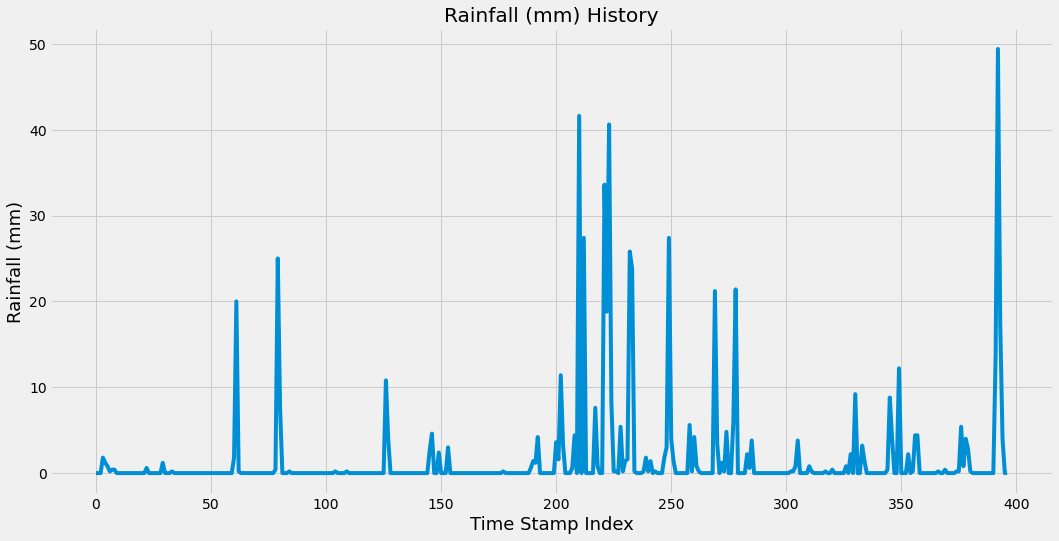

In [16]:
#Visualise rainfall (mm)
plt.figure(figsize = (16,8))
plt.title('Rainfall (mm) History')
plt.plot(df['Rainfall (mm)'])
plt.xlabel('Time Stamp Index', fontsize = 18)
plt.ylabel('Rainfall (mm)', fontsize = 18)
plt.show()

In [17]:
#Create new DataFrame with only Rainfall mm
rain = df.filter(['Rainfall (mm)'])
#Convert the dataframe to a numpy array
np_rain = rain.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(np_rain) * .8)

training_data_len

317

In [18]:
#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np_rain)

scaled_data

array([[-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [ 3.45304084e-02],
       [-7.14699151e-02],
       [-1.42136797e-01],
       [-2.48137121e-01],
       [-2.12803680e-01],
       [-2.12803680e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-1.77470239e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-7.14699151e-02],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.48137121e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.83470562e-01],
       [-2.8

In [19]:
#Create training data set
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Spit the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print() 

[array([-0.28347056, -0.28347056, -0.28347056,  0.03453041, -0.07146992,
       -0.1421368 , -0.24813712, -0.21280368, -0.21280368, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.17747024, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.07146992,
       -0.28347056, -0.28347056, -0.28347056, -0.24813712, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056,
       -0.28347056, -0.28347056, -0.28347056, -0.28347056, -0.28347056])]
[0.03453040839603616]

[array([-0.28347056, -0.28347056, -0.28347056,  0.03453041, -0.07146992,
       -0.1421368 , -0.24813712, -0.2

In [20]:
#Convert x_train and y_train into np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(257, 60, 1)

In [22]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compile the model
model.compile(optimizer='adam', loss = MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [25]:
#Train the model
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=75, epochs = 5, shuffle = True)

Epoch 1/5
3/3 [==============================] - 6s 633ms/step - loss: 1.3045 - root_mean_squared_error: 1.1421 - val_loss: 0.5556 - val_root_mean_squared_error: 0.7454
Epoch 2/5
3/3 [==============================] - 0s 131ms/step - loss: 1.2569 - root_mean_squared_error: 1.1211 - val_loss: 0.5600 - val_root_mean_squared_error: 0.7483
Epoch 3/5
3/3 [==============================] - 0s 149ms/step - loss: 1.2323 - root_mean_squared_error: 1.1101 - val_loss: 0.5634 - val_root_mean_squared_error: 0.7506
Epoch 4/5
3/3 [==============================] - 0s 132ms/step - loss: 1.2362 - root_mean_squared_error: 1.1118 - val_loss: 0.5681 - val_root_mean_squared_error: 0.7537
Epoch 5/5
3/3 [==============================] - 0s 123ms/step - loss: 1.2332 - root_mean_squared_error: 1.1105 - val_loss: 0.5642 - val_root_mean_squared_error: 0.7511


In [26]:
#Create testing dataset
#create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create the datasets x_test, y_test
x_test = []
y_test = np_rain[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [28]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 20ms/step


In [30]:
#Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.4551028567024423

C:\Users\tusha\AppData\Local\Temp\ipykernel_16680\1930683204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


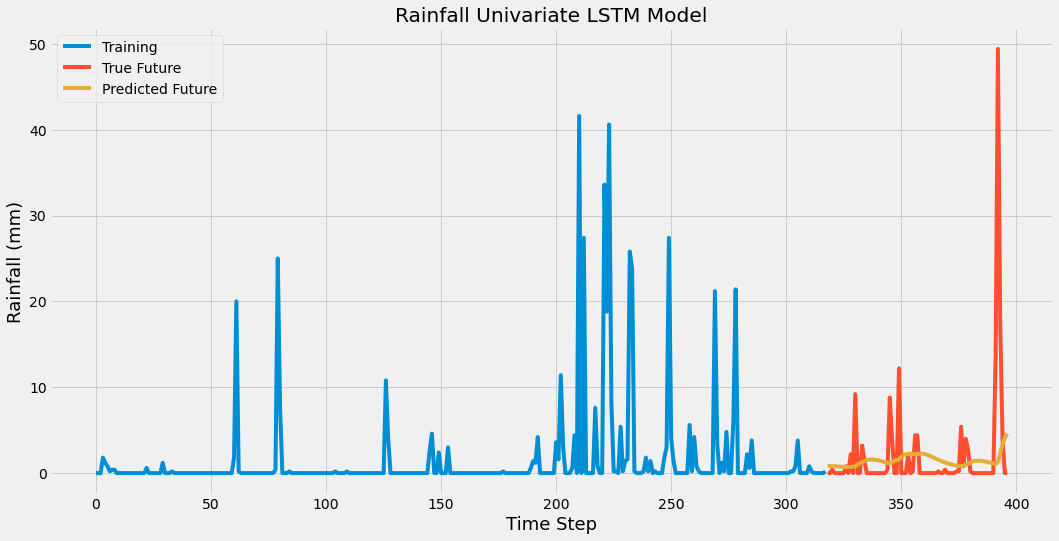

In [31]:
#Plot the data
train = rain[:training_data_len]
valid = rain[training_data_len:]
valid['Predictions'] = predictions

#Visualise
plt.figure(figsize = (16,8))
plt.title('Rainfall Univariate LSTM Model')
plt.xlabel('Time Step', fontsize = 18)
plt.ylabel('Rainfall (mm)', fontsize = 18)
plt.plot(train['Rainfall (mm)'])
plt.plot(valid[['Rainfall (mm)', 'Predictions']])
plt.legend(['Training', 'True Future', 'Predicted Future'],loc = 'upper left')
plt.show()

In [32]:
#Show the valid and predicted values
valid

,Rainfall (mm),Predictions
318,0.0,0.856862
319,0.0,0.833836
320,0.4,0.810264
321,0.0,0.794819
322,0.0,0.778515
...,...,...
392,49.4,1.292616
393,17.4,2.315956
394,4.0,3.343945
395,0.0,4.100955


In [33]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

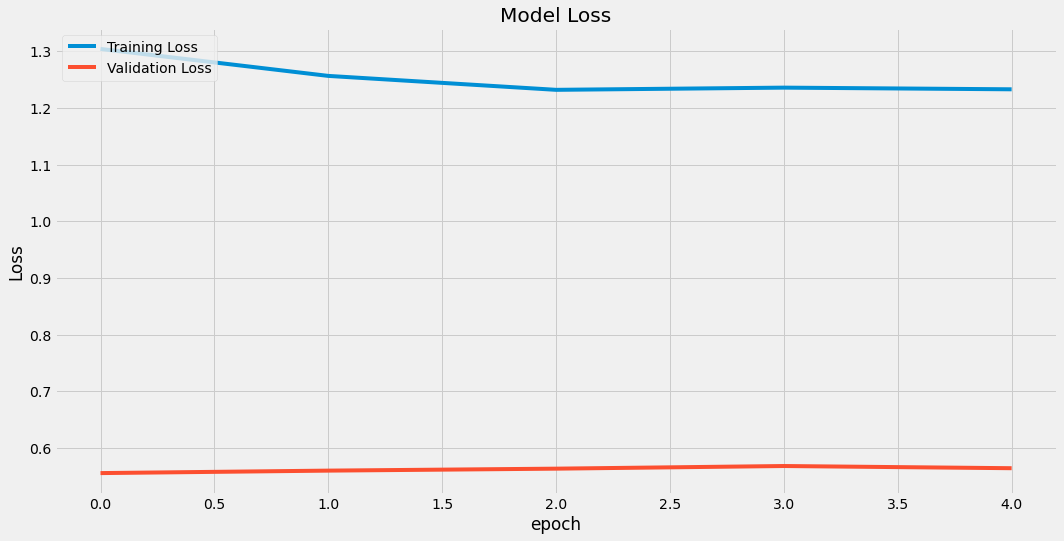

In [34]:
#Testing Accuracy
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

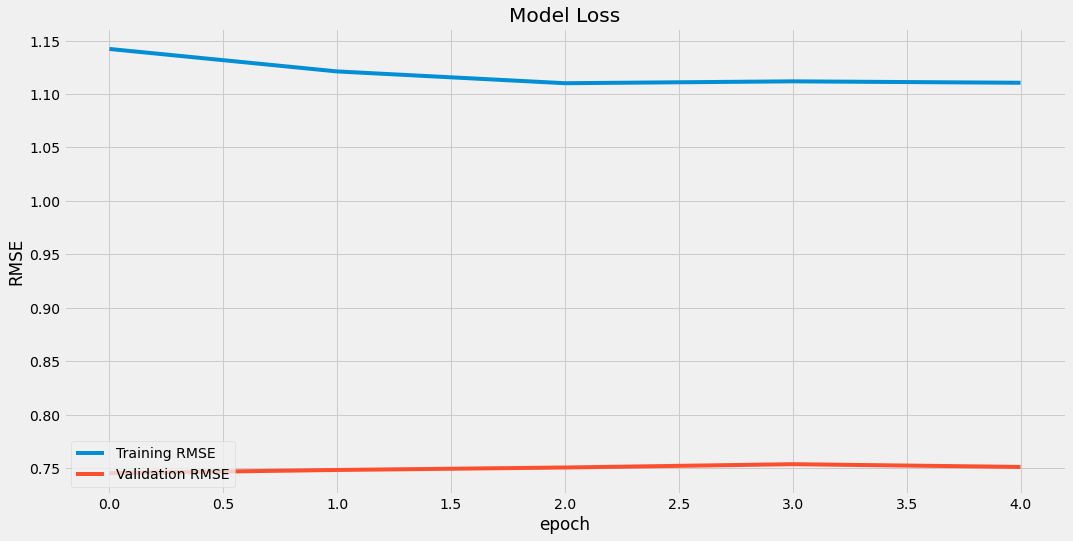

In [35]:
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Loss')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['Training RMSE', 'Validation RMSE'], loc='lower left')
plt.show()